# Know the right time  -  for getting advice from  HACKER NEWS  Expert:

In this study we will explore posts that were posted on *[Hacker News](https://news.ycombinator.com/)*. Hacker News is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "posts") are voted and commented upon, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of Hacker News' listings can get hundreds of thousands of visitors as a result.

Some posts can easily attract a lot of views, and comments. In this study we will explore aspects that impact the amount of comments for a post.

Post *title*: when creating posts, users can - optionally - add `Ask HN` or `Show HN` to the title of the post. They do so to explicitly 'ask' or 'show' something to the Hacker News community. We'll analyze whether posts with these tags receive more comments on average.

Post *timing*: also, we will explore whether posts published at certain times receive more comments on average.



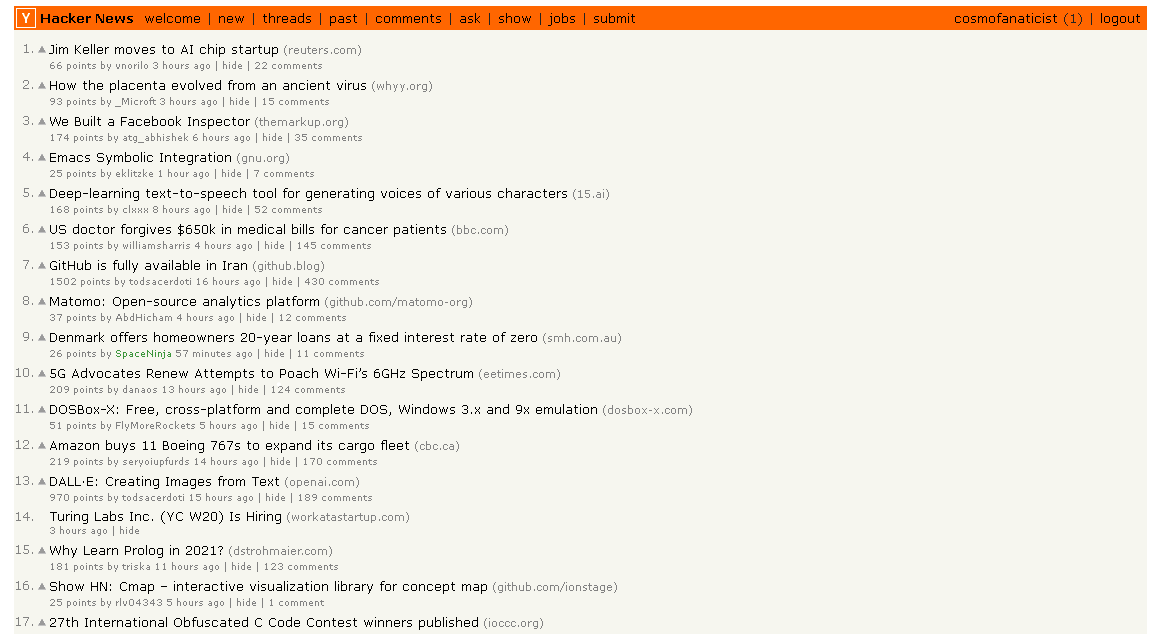

**Data**

The source data for this study can be found [here](https://www.kaggle.com/hacker-news/hacker-news-posts). The data is of 2016.

Let us start with reading in the data, and displaying the header row and a small sample.

We'll compare these two types of posts to determine the following:

Do `Ask HN` or `Show HN` receive more comments on average?
Do posts created at a certain time receive more comments on average?

In [1]:
#importing the file which is already present in my local host jupyter notebook 
from csv import reader
file=open('hacker_news.csv')
file1=reader(file)
hn=list(file1)


In [2]:
#fetching the top five rows for understanding the data 
for row in hn[:3]:
    print(row, '\n')

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'] 

['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'] 

['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'] 



Let's seperate column names from data, keep column names in `headers` , and keep the data in `hn` itself.

In [3]:
headers=hn[0] # fetching the headers of data 
print("No. of rows before removing Header: ", len(hn))
hn.remove(headers)
print("No. of rows after removing Header: ", len(hn))

No. of rows before removing Header:  20101
No. of rows after removing Header:  20100


In [4]:
top_two=hn[0:2] # Checking the data weather column names are removed or not
top_two

[['12224879',
  'Interactive Dynamic Video',
  'http://www.interactivedynamicvideo.com/',
  '386',
  '52',
  'ne0phyte',
  '8/4/2016 11:52'],
 ['10975351',
  'How to Use Open Source and Shut the Fuck Up at the Same Time',
  'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/',
  '39',
  '10',
  'josep2',
  '1/26/2016 19:30']]

Now lets divide our data into 3 categories:
- `ask_posts` : people asking something from hacker news.
- `show_posts` : people showing something to hacker news.
- `other_posts` : some other type of posts.

In [5]:
# Creating blank list.

ask_posts=[] 
show_posts=[]
other_posts=[]

# Fill the lists

for row in hn:
    title=row[1]
    title=title.lower()
    if title.startswith('ask hn'):
        ask_posts.append(row)
    elif title.startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)
        
# Print some samples

print('Sample post for "Ask": ','\n')
for post in ask_posts[:2]:
    print(post)
    
print('\n','Sample post for "Show": ','\n')
for post in show_posts[:2]:
    print(post)
    
print('\n', 'Sample post for "other":', '\n')
for post in other_posts[:2]:
    print(post)

    
# checking the totals

print('\n')
print('Lenth of original list is: ',len(hn))
print('Length of ask hn posts: ', len(ask_posts))
print('Length of show hn posts: ', len(show_posts))
print('Length of other posts: ', len(other_posts)) 
print('Sum of these three list is: ', len(ask_posts)+len(show_posts)+len(other_posts))

Sample post for "Ask":  

['12296411', 'Ask HN: How to improve my personal website?', '', '2', '6', 'ahmedbaracat', '8/16/2016 9:55']
['10610020', 'Ask HN: Am I the only one outraged by Twitter shutting down share counts?', '', '28', '29', 'tkfx', '11/22/2015 13:43']

 Sample post for "Show":  

['10627194', 'Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform', 'https://iot.seeed.cc', '26', '22', 'kfihihc', '11/25/2015 14:03']
['10646440', 'Show HN: Something pointless I made', 'http://dn.ht/picklecat/', '747', '102', 'dhotson', '11/29/2015 22:46']

 Sample post for "other": 

['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']
['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']


Lenth of original list is:  20100
Length of 

Next, let's determine if *ask posts* or *show posts* receive more comments on average.

In [6]:
#Total ask comments are

total_ask_comments=0
for row in ask_posts:
    num_comments=int(row[4])
    total_ask_comments=num_comments+total_ask_comments

#Average ask comments

avg_ask_comments=total_ask_comments/len(ask_posts)


# Total show comments are

total_show_comments=0
for row in show_posts:
    num_comments=int(row[4])
    total_show_comments=num_comments+total_show_comments

# Average show comments are

avg_show_comments=total_show_comments/len(show_posts)


print('\n')
print('Total "Ask_hn" comments are: ',total_ask_comments)
print('Total "Show_hn" comments are: ',total_show_comments)
print('\n')

print ('Average number of comments for "ask" posts is {:.2f}'.format(avg_ask_comments))
print ('Average number of comments for "show" posts is {:.2f}'.format(avg_show_comments))



Total "Ask_hn" comments are:  24483
Total "Show_hn" comments are:  11988


Average number of comments for "ask" posts is 14.04
Average number of comments for "show" posts is 10.32


So from he average we can conclude that `Ask Hn` receives more comments on average then `Show Hn`. 

- Now our main focus will be on `Ask Hn` posts.
- We will Find at which time the majority of comments are done on an `Ask Hn` post.

In [7]:
# Checking Ask_posts columns one more time

ask_posts[0:2]

[['12296411',
  'Ask HN: How to improve my personal website?',
  '',
  '2',
  '6',
  'ahmedbaracat',
  '8/16/2016 9:55'],
 ['10610020',
  'Ask HN: Am I the only one outraged by Twitter shutting down share counts?',
  '',
  '28',
  '29',
  'tkfx',
  '11/22/2015 13:43']]

**Note**

*4th index* specifies- number of comments.<br>
*6th index* specifies- the date and time.

**Task**
To check comments/hour.

In [8]:
import datetime as dt

# Create a list that contains the creation times and number of comments (ask-posts only)

created_at=[row[6] for row in ask_posts]
comments=[int(row[4]) for row in ask_posts]
n=len(comments)
result_list=[[created_at[i], comments[i]] for i in range(n)]
#print(result_list[0:3])

# Build frequency tables for the number of posts and for the number of comments, per hour of the day

counts_by_hours={}
comments_by_hours={}
for row in result_list:
    date=row[0]
    comment=row[1]
    date1=dt.datetime.strptime(date, '%m/%d/%Y %H:%M')
    hour=date1.strftime('%H')
    if hour not in counts_by_hours:
        counts_by_hours[hour]=1
        comments_by_hours[hour]=comment
    else:
        counts_by_hours[hour]+=1
        comments_by_hours[hour]=comments_by_hours[hour]+comment
   
    
print('No. of ask posts created during each hour of the day: ','\n')
print(counts_by_hours)

print('\n','No. of comments done on ask post per hour:','\n')
print(comments_by_hours)

No. of ask posts created during each hour of the day:  

{'09': 45, '13': 85, '10': 59, '14': 107, '16': 108, '23': 68, '12': 73, '17': 100, '15': 116, '21': 109, '20': 80, '02': 58, '18': 109, '03': 54, '05': 46, '19': 110, '01': 60, '22': 71, '08': 48, '04': 47, '00': 55, '06': 44, '07': 34, '11': 58}

 No. of comments done on ask post per hour: 

{'09': 251, '13': 1253, '10': 793, '14': 1416, '16': 1814, '23': 543, '12': 687, '17': 1146, '15': 4477, '21': 1745, '20': 1722, '02': 1381, '18': 1439, '03': 421, '05': 464, '19': 1188, '01': 683, '22': 479, '08': 492, '04': 337, '00': 447, '06': 397, '07': 267, '11': 641}


counts_by_hour: contains the number of ask posts created during each hour of the day.
comments_by_hour: contains the corresponding number of comments ask posts created at each hour received

In [9]:
# putting all the things in a single nested list

new_list=[]
for keys in counts_by_hours:
    a=counts_by_hours[keys]
for keys in comments_by_hours:
    new_list.append([keys,a,comments_by_hours[keys]])
new_list[:5]

[['09', 58, 251],
 ['13', 58, 1253],
 ['10', 58, 793],
 ['14', 58, 1416],
 ['16', 58, 1814]]

In [10]:
# Calculating average/hour
avg_by_hour=[]
for row in new_list:
    avg=row[2]/row[1]
    avg_by_hour.append([row[0], avg])
#print(avg_by_hour)

# swapping the output.

swap_avg_by_hour=[]
for row in avg_by_hour:
    swap_avg_by_hour.append([row[1], row[0]])
#print(swap_avg_by_hour

# putting it in descending order
sorted_swap=sorted(swap_avg_by_hour, reverse=True)
sorted_swap[0:5]

    

[[77.1896551724138, '15'],
 [31.275862068965516, '16'],
 [30.086206896551722, '21'],
 [29.689655172413794, '20'],
 [24.810344827586206, '18']]

In [11]:
for row in sorted_swap:
    date=dt.datetime.strptime(row[1], '%H')
    date=int(date.strftime('%H'))
    #print(date)
    text="For hour {:02d} the average number of comments per post is {:.2f}".format(date,row[0])
    print(text)

For hour 15 the average number of comments per post is 77.19
For hour 16 the average number of comments per post is 31.28
For hour 21 the average number of comments per post is 30.09
For hour 20 the average number of comments per post is 29.69
For hour 18 the average number of comments per post is 24.81
For hour 14 the average number of comments per post is 24.41
For hour 02 the average number of comments per post is 23.81
For hour 13 the average number of comments per post is 21.60
For hour 19 the average number of comments per post is 20.48
For hour 17 the average number of comments per post is 19.76
For hour 10 the average number of comments per post is 13.67
For hour 12 the average number of comments per post is 11.84
For hour 01 the average number of comments per post is 11.78
For hour 11 the average number of comments per post is 11.05
For hour 23 the average number of comments per post is 9.36
For hour 08 the average number of comments per post is 8.48
For hour 22 the average nu

So those are the **best times of days to post if you want to attract comments**. What is interesting to see is that the top 5 hours are on very different hours during the day. One possible explanation could be that **commenters are located across the globe**, and that *these different hours represent peak times for different time zones. (That would require further study though.)*

Note that the times above are for the *US Eastern Time*. (As per the dataset documentation.)

For our time zone (India Time), India is 10 hours and 30 mins ahead of US Eastern Time.

In [20]:
## Convert the times to indian Standard Time (GMT+5.30)

indian_time_list=[]

for row in sorted_swap:
    # format the hours, ignore daylight saving time
    str1 = (dt.datetime.strptime(row[1], "%H") + dt.timedelta(hours=10.30)).strftime("%H:%M")
    output = "For hour {hour}: {avg:.2f} average comments per post".format(hour = str1, avg = row[0])
    
    #making list having Indian Timimgs
    indian_time_list.append([row[0],str1])
    


# converting this list to dataframe

import pandas as pd

avg_comm_per_post_per_hour=pd.DataFrame(data=indian_time_list,columns=['avg','time'])
#print(avg_comm_per_post_per_hour)

# Rounding off the 1st column data upto two-decimal points
avg_comm_per_post_per_hour.iloc[:,0]=round(avg_comm_per_post_per_hour.iloc[:,0],2)
avg_comm_per_post_per_hour.sort_values(by=['time'],inplace=True)


### Conclusions
Refering back to the goal of this study, let's summarize the conclusions.

Post title: when creating posts, adding Ask HN to your post title will do better for attracting comments than adding Show HN:

- Ask HN: 14.04 average comments per post
- Show HN: 10.32 average comments per post
(It has not been compared with posts for not adding a tag at all.)

Post timing: the time of day of posting appears to have significant impact on the number of comments that you will attract. Based on an analysis of the Ask HN posts, the top hours (in Indian Time) are:

- Time near 1.18 : 77 average comments per post
- Time near 2.18 : 31.38 average comments per post
- Time near 7.18 : 30.09 average comments per post
